In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\rolan\Desktop\PHL-PSA-FIES-2021-V2-PUF\FIES PUF 2021 Volume 2TOTALS.csv")
display(df.head())

,W_REGN,W_PROV,SEQUENCE_NUMBER,URB,RFACT,FSIZE,RPROV,RPSU,PCINC,NPCINC,...,GNFOOD,TTOTEX,CTOTEX,KTOTEX,GTOTEX,LOSSES,TOINC,TTOTDIS,TOTHREC,TTOREC
0,1,28,1,2,103.1817,6.5,2800,217,107683.08,8.0,...,0,350404,328464,480,21460,0,699940,350404,0,699940
1,1,28,2,2,103.1817,4.0,2800,217,81202.50,7.0,...,0,231900,215240,15550,1110,0,324810,244620,2800,327610
2,1,28,3,2,103.1817,1.0,2800,217,190061.00,10.0,...,4356,147510,128869,3210,15431,0,190061,147510,0,190061
3,1,28,4,2,103.1817,3.0,2800,217,71235.00,7.0,...,7360,153456,136971,8685,7800,0,213705,153456,0,213705
4,1,28,5,2,103.1817,4.0,2800,217,68072.50,6.0,...,70650,229692,141972,15660,72060,0,272290,229692,8330,280620


##### Exploratory Data Analysis

In [3]:
print("Shape of data:", df.shape)

Shape of data: (165029, 37)


In [4]:
urb = df[['URB', 'PCINC', 'FSIZE', 'TFOOD', 'TNFOOD', 'TTOTEX', 'TOINC']]
display(urb.head())

,URB,PCINC,FSIZE,TFOOD,TNFOOD,TTOTEX,TOINC
0,2,107683.08,6.5,180505,169899,350404,699940
1,2,81202.50,4.0,110240,121660,231900,324810
2,2,190061.00,1.0,53431,94079,147510,190061
3,2,71235.00,3.0,76295,77161,153456,213705
4,2,68072.50,4.0,89148,140544,229692,272290


In [5]:
print("Shape of data:", urb.shape)

Shape of data: (165029, 7)


In [6]:
# Checking for NaN and dropping them.
nan_counts = urb.isna().sum()
print(nan_counts)

URB       0
PCINC     0
FSIZE     0
TFOOD     0
TNFOOD    0
TTOTEX    0
TOINC     0
dtype: int64


In [7]:
print(urb.dtypes)

URB         int64
PCINC     float64
FSIZE     float64
TFOOD       int64
TNFOOD      int64
TTOTEX      int64
TOINC       int64
dtype: object


In [8]:
urb.describe(include='all')

,URB,PCINC,FSIZE,TFOOD,TNFOOD,TTOTEX,TOINC
count,165029.000000,1.650290e+05,165029.000000,1.650290e+05,1.650290e+05,1.650290e+05,1.650290e+05
mean,1.520072,8.185092e+04,4.244409,9.359494e+04,1.244070e+05,2.180019e+05,2.960306e+05
std,0.499598,1.010066e+05,2.029229,5.674208e+04,1.510943e+05,1.895776e+05,3.318566e+05
min,1.000000,5.408630e+03,1.000000,2.939000e+03,2.095000e+03,8.794000e+03,1.037400e+04
25%,1.000000,3.540300e+04,3.000000,5.678100e+04,4.709500e+04,1.113850e+05,1.386820e+05
50%,2.000000,5.543200e+04,4.000000,8.072100e+04,8.153700e+04,1.673840e+05,2.102000e+05
75%,2.000000,9.400000e+04,5.500000,1.149940e+05,1.477940e+05,2.621180e+05,3.421950e+05
max,2.000000,9.691285e+06,23.000000,1.984454e+06,6.704533e+06,7.641695e+06,1.683868e+07


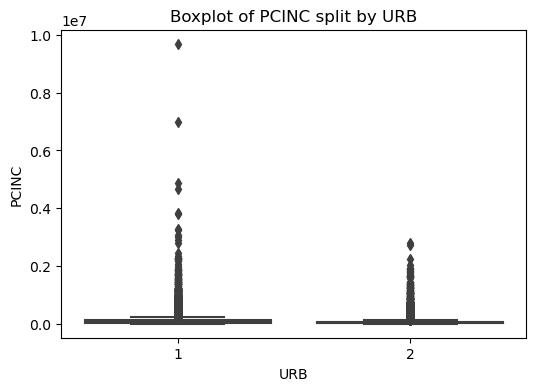

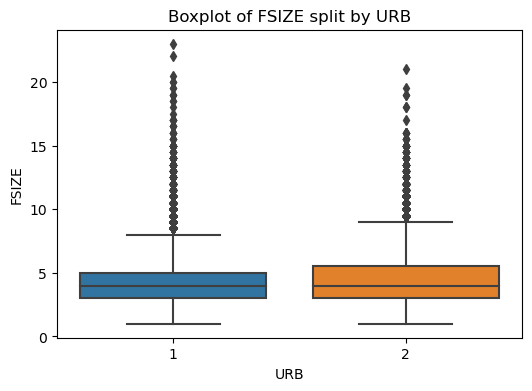

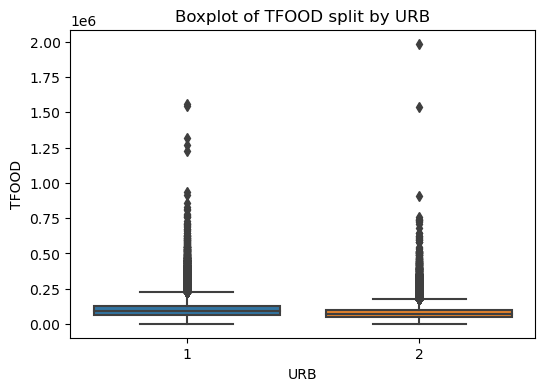

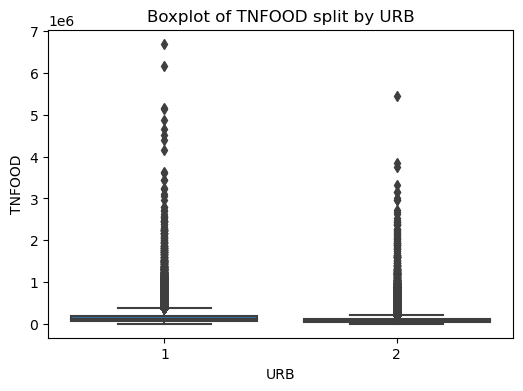

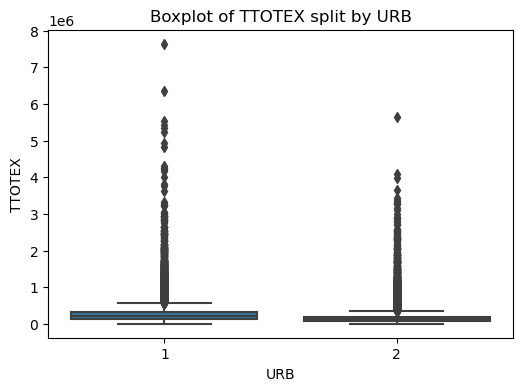

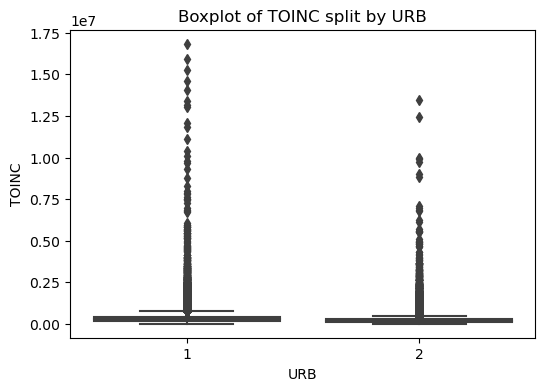

In [9]:
# Visualizing the count of URB per feature variable.
features = ['PCINC', 'FSIZE', 'TFOOD', 'TNFOOD', 'TTOTEX', 'TOINC']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='URB', y=feature, data=urb)
    plt.title(f'Boxplot of {feature} split by URB')

##### Checking Class Imbalance

In [10]:
counts = urb['URB'].value_counts()
print(counts)

2    85827
1    79202
Name: URB, dtype: int64


In [11]:
# Replacing 1,2 as 0 for Urban and 1 for Rural.
urb['URB'] = urb['URB'].replace({1: 0, 2: 1})

C:\Windows\Temp\ipykernel_4008\650923967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urb['URB'] = urb['URB'].replace({1: 0, 2: 1})


In [12]:
counts = urb['URB'].value_counts()
print(counts)

1    85827
0    79202
Name: URB, dtype: int64


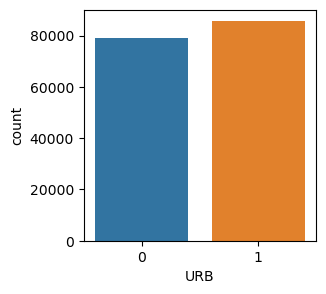

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(3, 3))
# Plotting the count of each class.
sns.countplot(x='URB', data=urb)
plt.show()

##### Splitting and Normalizing the Dataset

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the dataset into features(X) and target variable(y).
X = urb.drop('URB', axis=1)
y = urb.URB

# Splitting the dataset into training set and test set using stratified sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the data.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 10-fold Cross Validation, Grid Search, and Logistic Regression

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Defining the parameter grid.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initializing the model.
logreg = LogisticRegression(random_state=0)

# GridSearchCV with 10-fold cross-validation.
grid_search = GridSearchCV(logreg, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters.
best_params = grid_search.best_params_

# Training a new model with the best parameters.
best_logreg = LogisticRegression(**best_params, random_state=0)
best_logreg.fit(X_train_scaled, y_train)

# Making predictions with the best model.
y_pred_test = best_logreg.predict(X_test_scaled)

print('Logistic Regression:')
print(f'Best Parameters: {best_params}')

# Printing classification report.
print('Classification Report:')
print(classification_report(y_test, y_pred_test))

Logistic Regression:
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.47      0.56     15855
           1       0.62      0.80      0.70     17151

    accuracy                           0.64     33006
   macro avg       0.65      0.63      0.63     33006
weighted avg       0.65      0.64      0.63     33006



##### 10-fold Cross Validation, Grid Search, and K-Nearest Neighbors

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

y_pred_test = best_knn.predict(X_test_scaled)

print('K-Nearest Neighbors:')
print(f'Best Parameters: {best_params}')
print('Classification Report:')
print(classification_report(y_test, y_pred_test))

C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K-Nearest Neighbors:
Best Parameters: {'n_neighbors': 11}
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62     15855
           1       0.65      0.66      0.66     17151

    accuracy                           0.64     33006
   macro avg       0.64      0.64      0.64     33006
weighted avg       0.64      0.64      0.64     33006



##### 10-fold Cross Validation, Randomized Search, and RandomForest

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestClassifier(random_state=0)

grid_search = RandomizedSearchCV(rf, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_rf = RandomForestClassifier(**best_params, random_state=0)
best_rf.fit(X_train_scaled, y_train)

y_pred_test = best_rf.predict(X_test_scaled)

print('Random Forest:')
print(f'Best Parameters: {best_params}')
print('Classification Report:')
print(classification_report(y_test, y_pred_test))

Random Forest:
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.66     15855
           1       0.68      0.67      0.68     17151

    accuracy                           0.67     33006
   macro avg       0.67      0.67      0.67     33006
weighted avg       0.67      0.67      0.67     33006



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the parameter grid.
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the model.
dt = DecisionTreeClassifier(random_state=0)

# Perform RandomizedSearchCV with 10-fold cross-validation.
grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params = grid_search.best_params_

# Train a new model with the best parameters.
best_dt = DecisionTreeClassifier(**best_params, random_state=0)
best_dt.fit(X_train_scaled, y_train)

# Make predictions with the best model.
y_pred_test = best_dt.predict(X_test_scaled)

# Print the metrics.
print('Decision Tree:')
print(f'Best Parameters: {best_params}')
print('Classification Report:')
print(classification_report(y_test, y_pred_test))

Decision Tree:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65     15855
           1       0.68      0.66      0.67     17151

    accuracy                           0.66     33006
   macro avg       0.66      0.66      0.66     33006
weighted avg       0.66      0.66      0.66     33006



##### 10-fold Cross Validation, Grid Search, and XGBOOST

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500]
}

xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

grid_search = GridSearchCV(xgboost, param_grid, cv=StratifiedKFold(n_splits=10))
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_xgboost = XGBClassifier(**best_params, random_state=0)
best_xgboost.fit(X_train_scaled, y_train)

y_pred_test = best_xgboost.predict(X_test_scaled)

print('XGBoost:')
print(f'Best Parameters: {best_params}')
print('Classification Report:')
print(classification_report(y_test, y_pred_test))

XGBoost:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     15855
           1       0.68      0.68      0.68     17151

    accuracy                           0.67     33006
   macro avg       0.67      0.67      0.67     33006
weighted avg       0.67      0.67      0.67     33006



##### Confusion Matrix

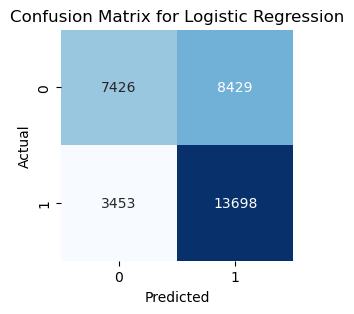

C:\Users\rolan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


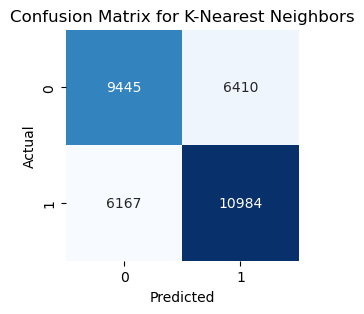

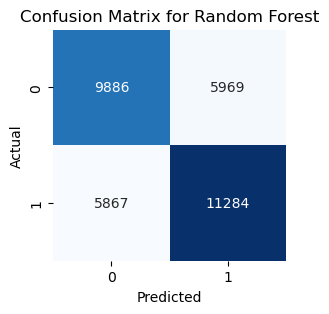

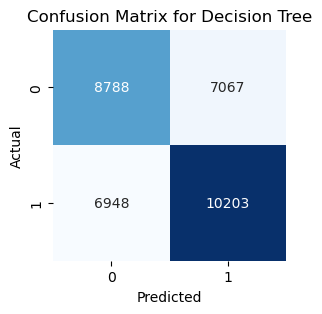

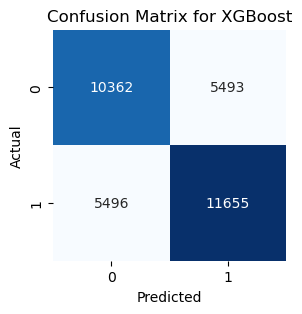

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

models = [LogisticRegression(random_state=0), KNeighborsClassifier(), RandomForestClassifier(random_state=0),
          DecisionTreeClassifier(random_state=0), XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)]

model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Decision Tree', 'XGBoost']

for model,name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred_test = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

##### ROC Curve for XGBOOST

Since XGBoost performed well on the model testing and showed larger values of True Positives and True Negatives in the confusion matrix:

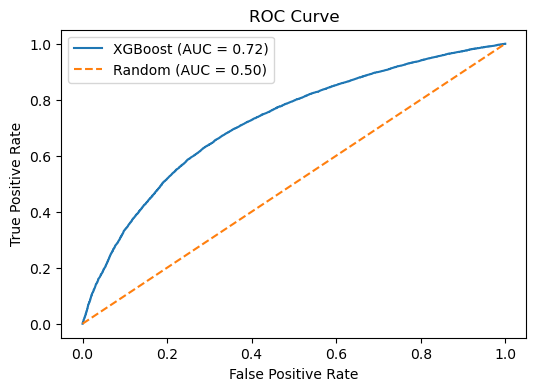

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Getting the predicted probabilities of the 'positive' class.
y_prob = best_xgboost.predict_proba(X_test_scaled)[:, 1]

# Calculating the ROC curve points.
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating the area under the ROC curve (AUC).
roc_auc = roc_auc_score(y_test, y_prob)

# Creating the ROC curve.
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (AUC = 0.50)')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##### SHAP (Shapley Additive Explanations)

Applying SHAP for post-hoc analysis to interpret XGBOOST model's output providing insight into the importance of each feature and their impact on the model's predictions.

In [22]:
import shap

# Printing the JS visualization code to the notebook.
shap.initjs()

# Creating SHAP explainer.
explainer = shap.TreeExplainer(best_xgboost)

# Calculating SHAP values for the test set.
shap_values = explainer.shap_values(X_test_scaled)

[23:53:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


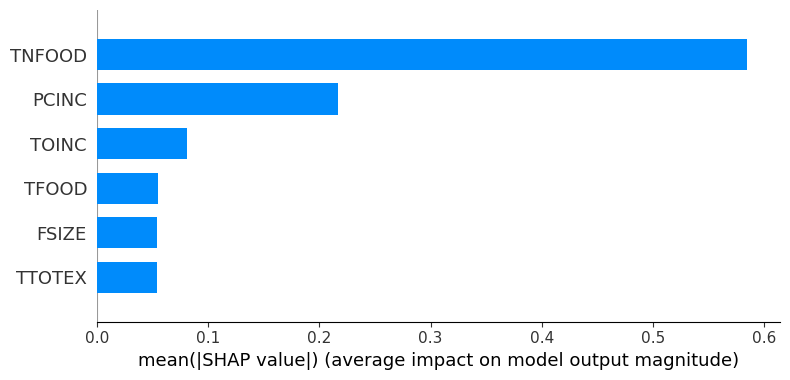

In [23]:
# Bar chart of mean importance--to see the average of the SHAP value magnitudes across the dataset.
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar')

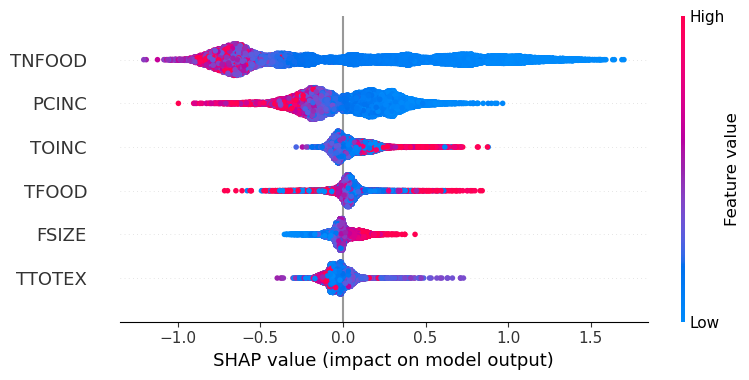

In [24]:
# SHAP Summary plot for Class '0'--density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset.
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

In [25]:
# Calculating Shap values for the features in the test set.
shap_values_instance = explainer.shap_values(X_test_scaled[0].reshape(1, -1))

# Creating a force plot.
shap.force_plot(explainer.expected_value, shap_values_instance, feature_names=X.columns)